In [2]:
#since noteboke doesn't work in jupiterlabs    %matplotlib notebook 
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [24]:
import os
os.chdir('/home/dana_z/ssd_2TB/6OHDA')
#import mpld3
#mpld3.enable_notebook()
import numpy as np
import scipy as sci
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import gridspec
import matplotlib.colors as Mcolors
import matplotlib.cm as cmx
import sys
import h5py
from IO import *
from utils import *
from plotUtils import *
from ColorSchems import colorPallet as CP
import pptx
from pptx import Presentation 
from pptx.util import Inches
from io import BytesIO
import re
import warnings
import pandas as pd
import sqlalchemy as db
import gc
from tqdm import tqdm
import seaborn as sns
import pywt # wavelet package
# for GLMM
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
Files = ['FinalData_6OHDA.h5','FinalData_6OHDA_H.h5','FinalData_6OHDA_H_skip.h5','FinalData_6OHDA_skip.h5']

In [5]:
miceList = getMiceList(Files[0])

In [65]:
df =  pd.read_hdf('corrsAndShuffles.h5','df')
df_creOn = pd.read_hdf('corrsAndShuffles','df_creOn')
df_creOff = pd.read_hdf('corrsAndShuffles','df_creOff')

df['Period'] = df.apply(lambda row: periodCalc(row.Day), axis=1)
df['cre'] = df.apply(lambda row: getCreType(Files[1],row.Mouse), axis=1)
df_creOn['cre'] = df_creOn.apply(lambda row: getCreType(Files[1],row.Mouse), axis=1)
df_creOn['Period'] = df_creOn.apply(lambda row: periodCalc(row.Day), axis=1)

# intialize the data sets
df_MSN_MSN = df[['Mouse','Sess','Day','Period','numred','cre']]
df_MSN_CRE = df[['Mouse','Sess','Day','Period','numred','cre']]
df_CRE_CRE = df[['Mouse','Sess','Day','Period','numred','cre']]


In [66]:
# calc mean and std for each shuffle:
df_MSN_MSN = df_MSN_MSN.merge(df.apply(lambda row: pd.Series({'sAll':np.nanmean(row['s_MSN-MSN']),
                                                              'sAll_std':np.nanstd(row['s_MSN-MSN']),
                                                              'All':row['MSN-MSN'],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')
df_MSN_CRE = df_MSN_CRE.merge(df[(df.cre!='NA')].apply(lambda row: pd.Series({'sAll':np.nanmean(row['s_'+'MSN-'+row.cre]),
                                                              'sAll_std':np.nanstd(row['s_'+'MSN-'+row.cre]),
                                                              'All':row['MSN-'+row.cre],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')

df_CRE_CRE = df_CRE_CRE.merge(df[(df.cre!='NA')].apply(lambda row: pd.Series({'sAll':np.nanmean(row['s_'+row.cre+'-'+row.cre]),
                                                              'sAll_std':np.nanstd(row['s_'+row.cre+'-'+row.cre]),
                                                              'All':row[row.cre+'-'+row.cre],
                                                              'Sess':row.Sess}) ,axis=1),
                              left_on='Sess', right_on='Sess')

df_MSN_MSN = df_MSN_MSN.merge(df_creOn.apply(lambda row: pd.Series({'sOn':np.nanmean(row['s_MSN-MSN']),
                                                              'sOn_std':np.nanstd(row['s_MSN-MSN']),
                                                              'On':row['MSN-MSN'],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')
df_MSN_CRE = df_MSN_CRE.merge(df_creOn[(df_creOn.cre!='NA')].apply(lambda row: pd.Series({'sOn':np.nanmean(row['s_'+'MSN-'+row.cre]),
                                                              'sOn_std':np.nanstd(row['s_'+'MSN-'+row.cre]),
                                                              'On':row['MSN-'+row.cre],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')

df_CRE_CRE = df_CRE_CRE.merge(df_creOn[(df_creOn.cre!='NA')].apply(lambda row: pd.Series({'sOn':np.nanmean(row['s_'+row.cre+'-'+row.cre]),
                                                              'sOn_std':np.nanstd(row['s_'+row.cre+'-'+row.cre]),
                                                              'On':row[row.cre+'-'+row.cre],
                                                              'Sess':row.Sess}) ,axis=1),
                              left_on='Sess', right_on='Sess')

df_MSN_MSN = df_MSN_MSN.merge(df_creOff.apply(lambda row: pd.Series({'sOff':np.nanmean(row['s_MSN-MSN']),
                                                              'sOff_std':np.nanstd(row['s_MSN-MSN']),
                                                              'Off':row['MSN-MSN'],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')


/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys
/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]
/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice
/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice
/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice


<IPython.core.display.Javascript object>


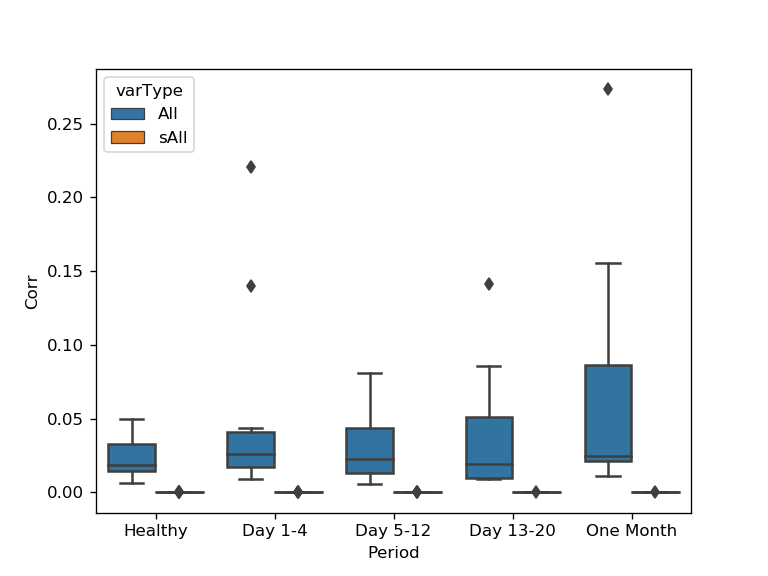

mean Population Pairwise Corr - MSN-MSN

 Healthy vs. Day 1-4
stats: 367.0, p-val: 0.0001 significant: yes

 Healthy vs. Day 5-12
stats: 479.0, p-val: 0.0013 significant: yes

 Healthy vs. Day 13-20
stats: 519.0, p-val: 0.0002 significant: yes

 Healthy vs. One Month
stats: 234.0, p-val: 0.0003 significant: yes



/home/dana_z/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2882: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/dana_z/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2883: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


In [69]:
MSN_melt = df_MSN_MSN.melt(id_vars=['Period','Mouse','cre'], value_vars=['All','sAll'],#,'On','sOn','Off','sOff'],
                           var_name='varType', value_name='Corr')
MSN_melt['Population'] = 'MSN-MSN'
MSNc_melt = df_MSN_CRE.melt(id_vars=['Period','Mouse','cre'], value_vars=['All','sAll'],#,'On','sOn'],
                           var_name='varType', value_name='Corr')
MSNc_melt['Population'] = 'MSN-CRE'
Cre_melt = df_CRE_CRE.melt(id_vars=['Period','Mouse','cre'], value_vars=['All','sAll'],#,'On','sOn'],
                           var_name='varType', value_name='Corr')
Cre_melt ['Population'] = 'CRE-CRE'

df_melt = MSN_melt.append([MSNc_melt,Cre_melt])
df2 = df_melt.groupby(['Period','Mouse','cre','Population','varType']).mean()
df2.reset_index(inplace=True)

g = sns.boxplot(x="Period", y="Corr", hue="varType", data=df2[(df2.Population=='MSN-MSN')], order = ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month'])
df2['Diff'] = df2.apply(lambda row: row.Corr-float(df2.query("Period == 'Healthy' and Mouse == '"+str(row.Mouse)+"' and Population == '"+str(row.Population)+"' and varType == '"+str(row.varType)+"'")['Corr']),axis=1)

# print stats:
print("mean Population Pairwise Corr - MSN-MSN")
print()
for p in ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month']:
    if p == "Healthy":
        continue
    a = df2.Diff[(df2.Period==p)]
    s = sci.stats.wilcoxon(a)
    sig = "yes" if s[1]<0.05 else "No"
    print(" Healthy vs. " + p)
    print("stats: " + str(s[0]) + ", p-val: " + "{:.4f}".format(s[1]) + " significant: " + sig)
    print()

#plt.savefig('figs/MSN-MSN_Corr.png',transparent=True,format='png')
#plt.savefig('figs/MSN-MSN_Corr.svg',transparent=True,format='svg') 


<IPython.core.display.Javascript object>


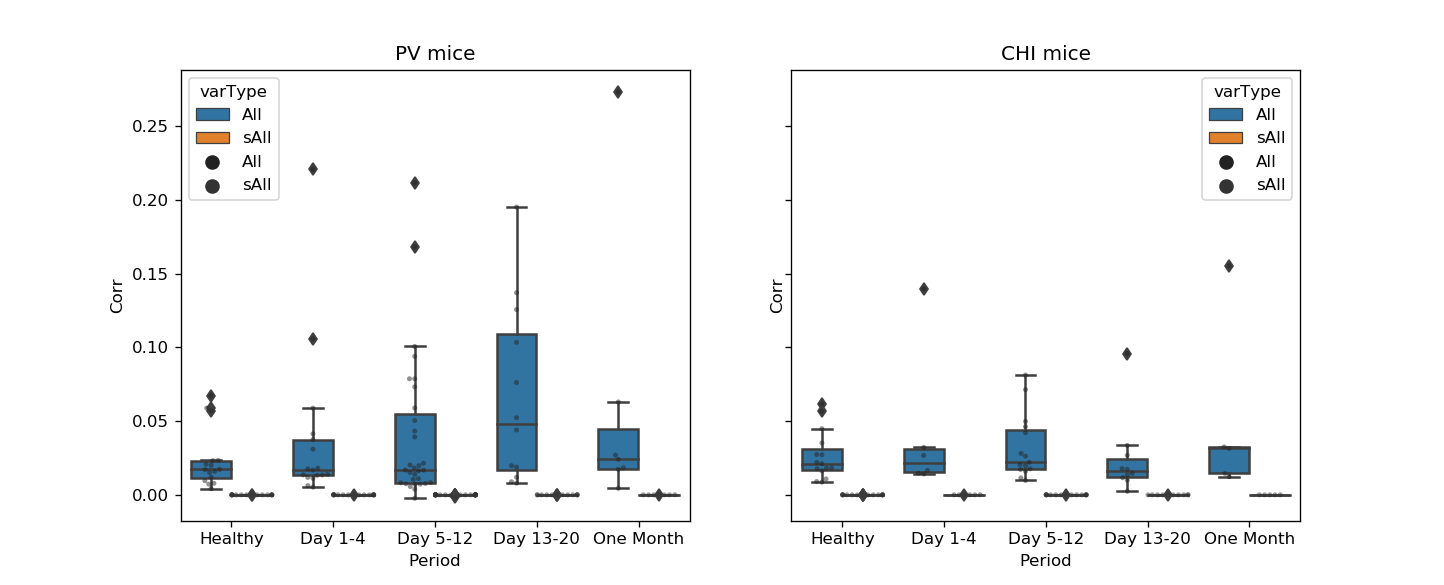

mean Population Pairwise Corr - MSN-MSN

PV:

 Healthy vs. Day 1-4
stats: 132.0, p-val: 0.4498 significant: No

 Healthy vs. Day 5-12
stats: 237.0, p-val: 0.4068 significant: No

 Healthy vs. Day 13-20
stats: 58.0, p-val: 0.0409 significant: yes

 Healthy vs. One Month
stats: 36.0, p-val: 0.0963 significant: No

CHI:

 Healthy vs. Day 1-4
stats: 45.0, p-val: 0.4845 significant: No

 Healthy vs. Day 5-12
stats: 98.0, p-val: 0.2807 significant: No

 Healthy vs. Day 13-20
stats: 55.0, p-val: 0.1397 significant: No

 Healthy vs. One Month
stats: 32.0, p-val: 0.3313 significant: No



In [70]:
MSN_melt = df_MSN_MSN.melt(id_vars=['Period','Sess','cre'], value_vars=['All','sAll'],
                           var_name='varType', value_name='Corr')
MSN_melt['Population'] = 'MSN-MSN'
# MSNc_melt = df_MSN_CRE.melt(id_vars=['Period','Mouse','cre'], value_vars=['On','sOn'],
#                            var_name='varType', value_name='Corr')
# MSNc_melt['Population'] = 'MSN-CRE'
# Cre_melt = df_CRE_CRE.melt(id_vars=['Period','Mouse','cre'], value_vars=['On','sOn'],
#                            var_name='varType', value_name='Corr')
# Cre_melt ['Population'] = 'CRE-CRE'

df_melt = MSN_melt#.append([MSNc_melt,Cre_melt])
df2 = df_melt.groupby(['Period','Sess','cre','Population','varType']).mean()
df2.reset_index(inplace=True)

fig, ax = plt.subplots(1,2,figsize=(12.04,4.88),sharey=True)
cres = ['PV','CHI']
for creind in range(0,len(cres)):
    g = sns.boxplot(x="Period", y="Corr", hue="varType",
                    data=df2[(df2.Population=='MSN-MSN')&(df2.cre==cres[creind])], dodge = True,
                    order = ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month'],ax=ax[creind])
    g = sns.swarmplot(x="Period", y="Corr", hue="varType", data=df2[(df2.Population=='MSN-MSN')&(df2.cre==cres[creind])],
                      order = ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month'],color = [.2,.2,.2],dodge = True,
                      ax=ax[creind],**{'label':'_nolegend_','alpha':0.5,'s':3})
    ax[creind].set_title(cres[creind]+" mice")
#df2['Diff'] = df2.apply(lambda row: row.Corr-float(df2.query("Period == 'Healthy' and Sess == '"+str(row.Sess)+"' and Population == '"+str(row.Population)+"'and cre == '"+str(row.cre)+"' and varType == '"+str(row.varType)+"'")['Corr']),axis=1)

# print stats:
print("mean Population Pairwise Corr - MSN-MSN")
print()
for cre in cres:
    print(cre+":")
    print()
    for p in ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month']:
        if p == "Healthy":
            continue

        a = df2.query("Period=='"+p+"' and cre =='"+cre+"' and varType =='All'")['Corr']
        b = df2.query("Period=='Healthy' and cre =='"+cre+"' and varType =='All'")['Corr']
        s = sci.stats.mannwhitneyu(a,b)          
#         a = df2.Diff[(df2.Period==p)&(df2.cre==cre)&(df2.varType=='Off')]
#         s = sci.stats.wilcoxon(a)
        sig = "yes" if s[1]<0.05 else "No"
        print(" Healthy vs. " + p)
        print("stats: " + str(s[0]) + ", p-val: " + "{:.4f}".format(s[1]) + " significant: " + sig)
        print()

#plt.savefig('figs/MSN-MSN_CreOff_Corr_Sess.png',transparent=True,format='png')
#plt.savefig('figs/MSN-MSN_CreOff_Corr_Sess.svg',transparent=True,format='svg') 


<IPython.core.display.Javascript object>


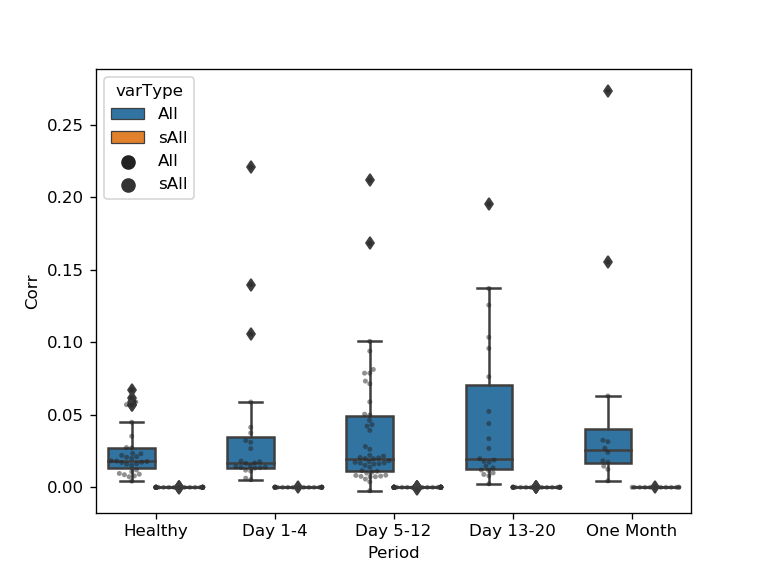

mean Population Pairwise Corr - MSN-MSN

 Healthy vs. Day 1-4
stats: 2574.0, p-val: 0.0159 significant: yes

 Healthy vs. Day 5-12
stats: 5774.0, p-val: 0.0986 significant: No

 Healthy vs. Day 13-20
stats: 2644.0, p-val: 0.0689 significant: No

 Healthy vs. One Month
stats: 1465.0, p-val: 0.1368 significant: No



In [71]:
# all by session
MSN_melt = df_MSN_MSN.melt(id_vars=['Period','Sess','cre'], value_vars=['All','sAll'],#,'On','sOn','Off','sOff'],
                           var_name='varType', value_name='Corr')
MSN_melt['Population'] = 'MSN-MSN'
MSNc_melt = df_MSN_CRE.melt(id_vars=['Period','Sess','cre'], value_vars=['All','sAll'],#,'On','sOn'],
                           var_name='varType', value_name='Corr')
MSNc_melt['Population'] = 'MSN-CRE'
Cre_melt = df_CRE_CRE.melt(id_vars=['Period','Sess','cre'], value_vars=['All','sAll'],#,'On','sOn'],
                           var_name='varType', value_name='Corr')
Cre_melt ['Population'] = 'CRE-CRE'

df_melt = MSN_melt.append([MSNc_melt,Cre_melt])
df2 = df_melt.groupby(['Period','Sess','cre','Population','varType']).mean()
df2.reset_index(inplace=True)

g = sns.boxplot(x="Period", y="Corr", hue="varType", data=df2[(df2.Population=='MSN-MSN')], order = ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month'])
g = sns.swarmplot(x="Period", y="Corr", hue="varType", data=df2[(df2.Population=='MSN-MSN')],
                      order = ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month'],color = [.2,.2,.2],dodge = True,
                      **{'label':'_nolegend_','alpha':0.5,'s':3})
#df2['Diff'] = df2.apply(lambda row: row.Corr-float(df2.query("Period == 'Healthy' and Mouse == '"+str(row.Sess)+"' and Population == '"+str(row.Population)+"' and varType == '"+str(row.varType)+"'")['Corr']),axis=1)

# print stats:
print("mean Population Pairwise Corr - MSN-MSN")
print()
for p in ['Healthy', 'Day 1-4', 'Day 5-12', 'Day 13-20', 'One Month']:
    if p == "Healthy":
        continue

    a = df2.query("Period=='"+p+"' and varType =='All'")['Corr']
    b = df2.query("Period=='Healthy' and varType =='All'")['Corr']
    s = sci.stats.mannwhitneyu(a,b)          
#         a = df2.Diff[(df2.Period==p)&(df2.cre==cre)&(df2.varType=='Off')]
#         s = sci.stats.wilcoxon(a)
    sig = "yes" if s[1]<0.05 else "No"
    print(" Healthy vs. " + p)
    print("stats: " + str(s[0]) + ", p-val: " + "{:.4f}".format(s[1]) + " significant: " + sig)
    print()

#plt.savefig('figs/MSN-MSN_Corr.png',transparent=True,format='png')
#plt.savefig('figs/MSN-MSN_Corr.svg',transparent=True,format='svg') 


In [82]:
# get data including ALL mice, not just PV and CHI 
df_MSN_MSN = df[['Mouse','Sess','Day','Period','numred','cre']]
df_MSN_MSN = df_MSN_MSN.merge(df.apply(lambda row: pd.Series({'sAll':np.nanmean(row['s_MSN-MSN']),
                                                              'sAll_std':np.nanstd(row['s_MSN-MSN']),
                                                              'All':row['MSN-MSN'],
                                                              'Sess':row.Sess}),axis=1),
                              left_on='Sess', right_on='Sess')
df_MSN_MSN.Mouse = df_MSN_MSN.Mouse.astype('category')
df_MSN_MSN.Period = df_MSN_MSN.Period.astype('category')
df_MSN_MSN = df_MSN_MSN[df_MSN_MSN.All.notnull()] 

/home/dana_z/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: Mean of empty slice
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dana_z/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [86]:
df_MSN_MSN.to_csv('df_MSN_MSN.csv')

In [75]:
md = smf.mixedlm(" All ~ Day", df_MSN_MSN, groups=df_MSN_MSN["Mouse"])#,re_formula="~Period")
mdf = md.fit()
print(mdf.summary())

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: All     
No. Observations: 134     Method:             REML    
No. Groups:       13      Scale:              0.0019  
Min. group size:  1       Log-Likelihood:     174.1217
Max. group size:  18      Converged:          Yes     
Mean group size:  10.3                                
------------------------------------------------------
            Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------
Intercept    0.024    0.009  2.581 0.010  0.006  0.042
Day[T.1]    -0.003    0.023 -0.130 0.897 -0.049  0.043
Day[T.2]    -0.009    0.020 -0.445 0.656 -0.047  0.030
Day[T.3]     0.032    0.021  1.503 0.133 -0.010  0.073
Day[T.4]     0.022    0.017  1.288 0.198 -0.012  0.056
Day[T.5]     0.027    0.023  1.161 0.246 -0.019  0.073
Day[T.6]     0.029    0.017  1.677 0.093 -0.005  0.063
Day[T.7]    -0.003    0.021 -0.124 0.901 -0.044  0.039
Day[T.8]     0.007 

/home/dana_z/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [84]:
md = smf.mixedlm(" All ~ Period", df_MSN_MSN, groups=df_MSN_MSN["Mouse"])#,re_formula="~Period")
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   All     
No. Observations:     211       Method:               REML    
No. Groups:           16        Scale:                0.0016  
Min. group size:      3         Log-Likelihood:       353.9625
Max. group size:      19        Converged:            Yes     
Mean group size:      13.2                                    
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.039    0.008  4.619 0.000  0.022  0.056
Period[T.Day 13-20]  0.005    0.010  0.540 0.589 -0.014  0.024
Period[T.Day 5-12]  -0.007    0.008 -0.824 0.410 -0.024  0.010
Period[T.Healthy]   -0.013    0.009 -1.392 0.164 -0.031  0.005
Period[T.One Month]  0.008    0.011  0.793 0.428 -0.012  0.029
Group Var            0.000    0.004                           



/home/dana_z/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [77]:
md = smf.mixedlm(" All ~ Period", df_MSN_MSN, groups=df_MSN_MSN["cre"])#,re_formula="~Period")
mdf = md.fit()
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   All     
No. Observations:     134       Method:               REML    
No. Groups:           2         Scale:                0.0021  
Min. group size:      51        Log-Likelihood:       205.6199
Max. group size:      83        Converged:            Yes     
Mean group size:      67.0                                    
--------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------
Intercept            0.038    0.010  3.629 0.000  0.017  0.058
Period[T.Day 13-20]  0.010    0.014  0.704 0.482 -0.017  0.037
Period[T.Day 5-12]  -0.001    0.012 -0.077 0.938 -0.024  0.022
Period[T.Healthy]   -0.013    0.013 -0.984 0.325 -0.038  0.013
Period[T.One Month]  0.018    0.017  1.110 0.267 -0.014  0.051
Group Var            0.000    0.002                           



/home/dana_z/anaconda3/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
